Processing points for block 3b5e4487-0607-4c5c-89ff-933a8e5857de: [(698, 176), (730, 178), (728, 183), (702, 183), (715, 190), (844, 187), (861, 196), (873, 192), (879, 206), (912, 222), (894, 227), (954, 227), (887, 233), (963, 245), (966, 255), (958, 266), (965, 275), (951, 287), (952, 294), (928, 296), (956, 305), (942, 310), (949, 324), (938, 331), (947, 338), (917, 351), (722, 351), (697, 359), (679, 354), (612, 368), (504, 371), (513, 376), (612, 378), (635, 390), (589, 404), (561, 398), (534, 404), (342, 405), (326, 404), (314, 391), (273, 402), (266, 397), (264, 368), (224, 368), (222, 363), (222, 358), (266, 358), (262, 349), (215, 345), (226, 332), (210, 308), (215, 289), (208, 273), (215, 243), (226, 232), (226, 212), (275, 212), (275, 203), (289, 201), (295, 190), (353, 181), (375, 183), (397, 194), (507, 185), (536, 199), (562, 196), (616, 206), (659, 206), (674, 187), (698, 189), (698, 176)]
Processing points for block 117bd937-eb97-4850-a9ba-3537295a4ef1: [(339, 494), (7

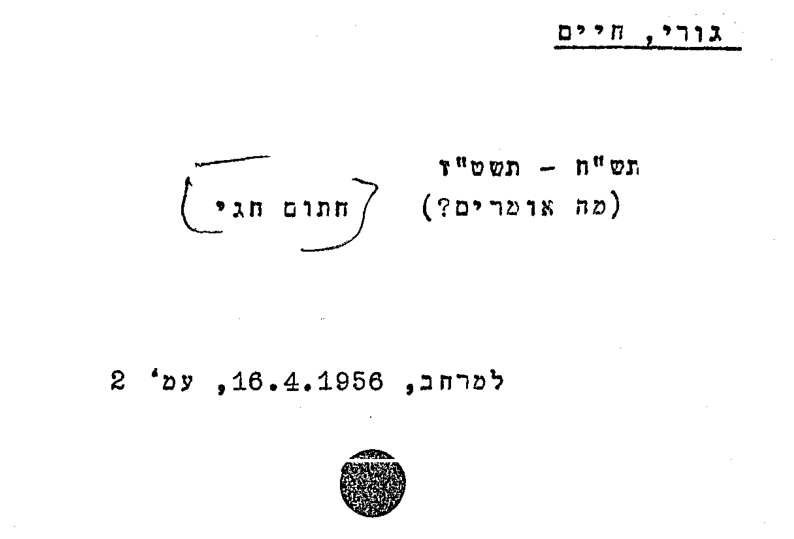

In [15]:
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def load_image(image_path):
    # Open and load the image
    try:
        image = Image.open(image_path)
        return image
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

def parse_xml(xml_path):
    # Parse the XML file and extract coordinates and tags from <TextBlock> elements
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        # Initialize list for storing coordinates and tags
        blocks = []
        
        # Find all the TextBlock elements
        for text_block in root.findall(".//{http://www.loc.gov/standards/alto/ns-v4#}TextBlock"):
            points = []
            tag = text_block.get('TAGREFS', 'NoTag')  # Get the associated tag or 'NoTag'
            shape = text_block.find(".//{http://www.loc.gov/standards/alto/ns-v4#}Polygon")
            
            if shape is not None:
                points_str = shape.get('POINTS')
                if points_str:
                    try:
                        # Extract the points by treating every two consecutive values as (x, y)
                        coords = points_str.split()
                        points = [(int(coords[i]), int(coords[i+1])) for i in range(0, len(coords), 2)]
                        print(f"Processing points for block {text_block.get('ID')}: {points}")
                    except (IndexError, ValueError) as e:
                        print(f"Error parsing points for block {text_block.get('ID')}: {e}")
            
            if points:
                blocks.append((points, tag))
            else:
                print(f"No valid points found for block {text_block.get('ID')}")
        
        return blocks
    except Exception as e:
        print(f"Error parsing XML: {e}")
        return None

def draw_blocks_on_image(image, blocks):
    draw = ImageDraw.Draw(image)
    
    for block in blocks:
        points, tag = block
        if points:
            x_values = [p[0] for p in points]
            y_values = [p[1] for p in points]
            
            # Draw a bounding box around the block to ensure it's visible
            draw.rectangle([min(x_values), min(y_values), max(x_values), max(y_values)], outline="blue", width=5)
            
            # Optionally, write the tag near the box for identification
            draw.text((min(x_values), min(y_values)), tag, fill="yellow")
    
    return image


def display_image(image):
    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    # Specify your image and XML paths
    image_path = "trial_image_1.tif"  # Change to your image file path (jpg, tif, png)
    xml_path = "trial_combined.xml"   # Change to your XML file path
    
    # Load the image
    image = load_image(image_path)
    
    if image:
        # Parse the XML to get blocks and tags
        blocks = parse_xml(xml_path)
        
        if blocks:
            # Draw the blocks over the image
            image_with_blocks = draw_blocks_on_image(image, blocks)
            # Display the final image with overlays
            display_image(image_with_blocks)
        else:
            print("No blocks found in XML.")
    else:
        print("Image not loaded.")


In [7]:
# Get the image dimensions
image_width, image_height = image.size
print(f"Image dimensions: {image_width}x{image_height}")

# Get the dimensions from the XML <Page>
tree = ET.parse(xml_path)
root = tree.getroot()
page_element = root.find(".//{http://www.loc.gov/standards/alto/ns-v4#}Page")
if page_element is not None:
    xml_page_width = int(page_element.get('WIDTH', 0))
    xml_page_height = int(page_element.get('HEIGHT', 0))
    print(f"XML page dimensions: {xml_page_width}x{xml_page_height}")


Image dimensions: 1186x795
XML page dimensions: 1186x795


In [10]:
for block in blocks:
    points, tag = block
    print(f"Block {tag}: {points}")
    if points:
        x_values = [p[0] for p in points]
        y_values = [p[1] for p in points]
        print(f"x range: {min(x_values)} to {max(x_values)}, y range: {min(y_values)} to {max(y_values)}")


Block REGION_TYPE_3: [(698, 176), (730, 178), (728, 183), (702, 183), (715, 190), (844, 187), (861, 196), (873, 192), (879, 206), (912, 222), (894, 227), (954, 227), (887, 233), (963, 245), (966, 255), (958, 266), (965, 275), (951, 287), (952, 294), (928, 296), (956, 305), (942, 310), (949, 324), (938, 331), (947, 338), (917, 351), (722, 351), (697, 359), (679, 354), (612, 368), (504, 371), (513, 376), (612, 378), (635, 390), (589, 404), (561, 398), (534, 404), (342, 405), (326, 404), (314, 391), (273, 402), (266, 397), (264, 368), (224, 368), (222, 363), (222, 358), (266, 358), (262, 349), (215, 345), (226, 332), (210, 308), (215, 289), (208, 273), (215, 243), (226, 232), (226, 212), (275, 212), (275, 203), (289, 201), (295, 190), (353, 181), (375, 183), (397, 194), (507, 185), (536, 199), (562, 196), (616, 206), (659, 206), (674, 187), (698, 189), (698, 176)]
x range: 208 to 966, y range: 176 to 405
Block REGION_TYPE_1: [(339, 494), (711, 499), (739, 505), (757, 558), (852, 561), (75

In [11]:
print(f"Original points: {points}")


Original points: [(949, 220), (954, 220), (958, 223), (942, 223), (949, 220)]


In [12]:
def draw_blocks_on_image(image, blocks):
    draw = ImageDraw.Draw(image)
    
    for block in blocks:
        points, tag = block
        if points:
            x_values = [p[0] for p in points]
            y_values = [p[1] for p in points]
            # Draw bounding box around the block
            draw.rectangle([min(x_values), min(y_values), max(x_values), max(y_values)], outline="blue", width=3)
            # Optionally, write the tag near the box
            draw.text((min(x_values), min(y_values)), tag, fill="yellow")
    
    return image
